# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Machine Learning for Financial Inclusion by University of Eswatini on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [2]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from google.colab import files
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
#from sklearn.pipeline import FeatureUnion
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
#from sklearn.pipeline import Pipeline

In [4]:
from sklearn.model_selection import GridSearchCV

In [107]:
#from sklearn.linear_model import LogisticRegression

### Read files

In [5]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

### Some basic EDA

In [6]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [5]:
# Preview the first five rows of the train set
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
# Preview the first five rows of the test set
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [105]:
train.shape

(23524, 13)

In [8]:
# Preview the first five rows of the sample submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [8]:
# Check the shape of the train and test sets
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (23524, 13)
The shape of the test set is: (10086, 12)


## Combine train and test set for easy preprocessing 

In [9]:
# mapping the bank account with 0 to NO and 1 to YES
train['bank_account'] = train['bank_account'].map({'No':0, 'Yes':1})

In [10]:
from sklearn.utils import resample

In [14]:
train['bank_account'].value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

Here i was assigning the bank account classifications a variable.

In [13]:
train_minority = train[train['bank_account']==1]
train_majority = train[train['bank_account']==0]

In [15]:
#Upsample minority class
train_minority_upsampled = resample(train_minority, 
                                 replace=True,     
                                 n_samples=20212,# number of those without bank account
                                   random_state=123) # just to make sure results are reproducible (seeding)

In [16]:
# Combine majority class with upsampled majority class
train_up_sampled = pd.concat([train_majority, train_minority_upsampled])

I check the bank account feature, "0" for no bank account and "1" for bank account(yes)

In [17]:
train_up_sampled.bank_account.value_counts()

0    20212
1    20212
Name: bank_account, dtype: int64

In [18]:
train_up_sampled['bank_account'].value_counts()

0    20212
1    20212
Name: bank_account, dtype: int64

In [82]:
# Combine train and test set
#ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

#all_data = pd.concat((train, test)).reset_index(drop=True)
#print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (33610, 13)


In [19]:
train_up_sampled.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
14053,Rwanda,2016,uniqueid_7986,1,Rural,Yes,6,27,Male,Head of Household,Married/Living together,Primary education,Informally employed
9054,Rwanda,2016,uniqueid_2987,1,Rural,Yes,6,31,Female,Child,Married/Living together,Tertiary education,Farming and Fishing
5047,Kenya,2018,uniqueid_5048,1,Urban,Yes,6,43,Male,Head of Household,Married/Living together,Secondary education,Formally employed Private
2282,Kenya,2018,uniqueid_2283,1,Rural,Yes,4,56,Female,Spouse,Married/Living together,Primary education,Remittance Dependent
12830,Rwanda,2016,uniqueid_6763,1,Rural,Yes,4,53,Female,Head of Household,Widowed,No formal education,Farming and Fishing


In [20]:
# Preview the last five rows of the combined dataframe
#all_data.tail()

### Distribution of the target variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


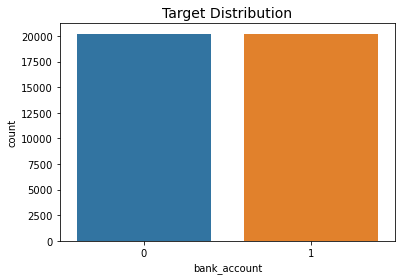

In [21]:
sns.countplot(train_up_sampled.bank_account)
plt.title('Target Distribution', fontdict={'size':14});

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


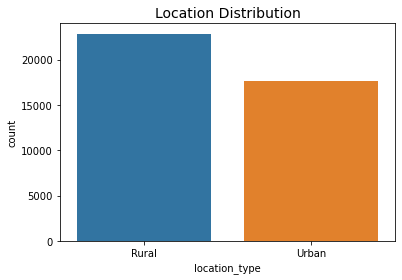

In [22]:
sns.countplot(train_up_sampled.location_type)
plt.title('Location Distribution', fontdict={'size':14});

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


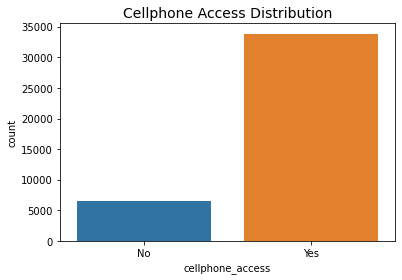

In [23]:
sns.countplot(train_up_sampled.cellphone_access)
plt.title('Cellphone Access Distribution', fontdict={'size':14});

Here we see the overall distribution for the whole train set. Can you see if there are any differences due to country?

### Number of unique values per categorical column

In [24]:
#ntrain

In [25]:
# Check the column names and datatypes
#all_data.info()

In [26]:
# Check unique values for each categorical column
cat_cols = ['country',	'location_type',	'cellphone_access',	'gender_of_respondent',	'relationship_with_head', 'marital_status', 'education_level',	'job_type']
for col in cat_cols:
  print(col)
  print(train_up_sampled[col].nunique(), '\n')

country
4 

location_type
2 

cellphone_access
2 

gender_of_respondent
2 

relationship_with_head
6 

marital_status
5 

education_level
6 

job_type
10 



### Feature Engineering


#### Try different strategies of dealing with categorical variables
Tips:
 - One hot encoding
 - Label encoding
 - Target encoding
 - Reduce the number of unique values...

In [ ]:
#all_data = OneHotEncoder(all_data, categories='auto')

In [21]:
OneHotEncoder?

Encoding categorigal variables of test sample using pandas dummies

In [51]:
test_df = pd.get_dummies(data = test, columns = cat_cols)
test_df

,year,uniqueid,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,uniqueid_6056,3,30,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2018,uniqueid_6060,7,51,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2018,uniqueid_6065,3,77,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,2018,uniqueid_6072,6,39,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2018,uniqueid_6073,3,16,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,2018,uniqueid_2998,2,62,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
10082,2018,uniqueid_2999,8,42,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
10083,2018,uniqueid_3000,1,39,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
10084,2018,uniqueid_3001,6,28,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
# Encode categorical features
train_up_sampled = pd.get_dummies(data = train_up_sampled, columns = cat_cols)
train_up_sampled.head()

,year,uniqueid,bank_account,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
1,2018,uniqueid_2,0,5,70,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,2018,uniqueid_4,0,5,34,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,2018,uniqueid_5,0,8,26,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,2018,uniqueid_6,0,7,26,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6,2018,uniqueid_7,0,7,32,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [28]:
# Separate train and test data from the combined dataframe
#train_df = all_data[:ntrain]
#test_df = all_data[ntrain:]

# Check the shapes of the split dataset
#train_df.shape, test_df.shape

### Training and making predictions
Tips:
- Is lgbm the best model for this challenge?
- Parameter tuning
 - Grid search, random search, perhaps bayesian search works better...



In [29]:
y = train_up_sampled.bank_account
X = train_up_sampled.drop(['bank_account', 'uniqueid'], axis=1)

In [31]:
# Select main columns to be used in training
#main_cols = all_data.columns.difference(date_cols+['ID', 'bank_account'])
#main_cols = all_data.columns.difference(['uniqueid', 'bank_account'])
#X = train_df[main_cols]
#y = train_df['bank_account']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Train model
model = LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the accuracy score of the model
accuracy_score(y_pred,y_test)

0.8123350923482849

In [33]:
# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Train model
#model = LGBMClassifier()
#model.fit(X_train, y_train)

# Make predictions
#y_pred = model.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)

Checking RandomForestClassifier default hyperparameters

In [34]:
forest = RandomForestClassifier(random_state=17) # I just think 17 is the best prime number

In [35]:
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [36]:
yhat = forest.predict(X_test)

In [37]:
accuracy_score(yhat,y_test)

0.9181233509234829

Hyperparameter tuning RandomForestClassiier using GridSearchCV, i just guessed these hyperparameters unfortunately

In [38]:
n_estimators = [100, 120, 150, 200]
max_depth = [5, 8, 15, 20]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 8] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


just checking the best model

In [40]:
bestF.best_estimator_

RandomForestClassifier(max_depth=20, random_state=17)

Best accuracy score (still not sure of the exact metric here)

In [41]:
bestF.best_score_

0.8876166242578457

Best hyperparameters

In [42]:
bestF.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

Summary of gridsearch

In [43]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",bestF.best_estimator_)
print("\n The best score across ALL searched params:\n",bestF.best_score_)
print("\n The best parameters across ALL searched params:\n",bestF.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=20, random_state=17)

 The best score across ALL searched params:
 0.8876166242578457

 The best parameters across ALL searched params:
 {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Using optimal hyperparameters found form gridsearchCV

In [45]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 20, n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1)

In [46]:
forestOpt.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=1)

In [47]:
yhat = forestOpt.predict(X_test)

Using their(zindi) accuracy score

In [48]:
accuracy_score(yhat,y_test)

0.9023746701846965

### Making predictions of the test set and creating a submission file

<ipython-input-54-7eaa34562752>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  sub_file.predictions = predictions
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


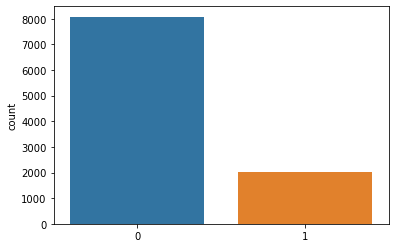

In [54]:
# Make prediction on the test set
test_df = test_df.drop(['uniqueid'], axis=1)
predictions = forestOpt.predict(test_df)

# Create a submission file
sub_file = ss.copy()
sub_file.predictions = predictions

# Check the distribution of your predictions
sns.countplot(sub_file.predictions);

In [40]:
# Create a csv file and upload to zindi 
sub_file.to_csv('RForestOpt_Baseline.csv', index = False)

In [1]:
#files.download('Baseline.csv') 

###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************